# Week X - Plotting Data

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Displaying Data](#display)
1. [Displaying Multiple Plots](#subplots)
1. [Histograms](#histograms)


<hr style="border:2px solid gray">

# Displaying Data [^](#index) <a id='display'></a>

The ability to display data is often an important first step in understanding the information. Producing clear and understandable (appropriately labelled, legible etc) plots is an important part of communicating your results to others. The purpose of this section is to make sure that you are familiar with the display options in matplotlib and can make professional looking plots. In the assignments you perform at the end of the two weeks, this is one aspect that you will be judged upon. 

Consider and run the following (very simple) example.

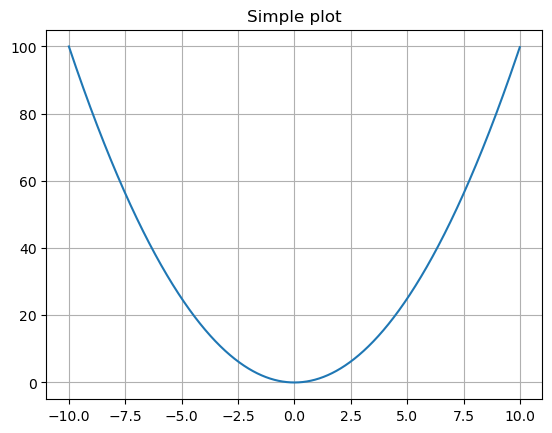

In [1]:
import numpy as np
import pylab as pl # one of the several ways of importing matplotlib

x= np.arange(-10,10,0.01)
y=x*x

pl.plot(x,y)
pl.grid()
pl.title("Simple plot")
pl.show()

<div style="background-color:#C2F5DD">

### Exercise

Create a graph of a $y=\sin^2(x)$ going from $-2\pi$ to $+2\pi$ (and no further). Make sure that the axes are labelled as $x$ and $y$ and that the equation is written as legend on this graph. Change the $x-axis$ tick marks to be multiples of $\frac{\pi}{4}$ and labelled appropriately. Add a grid to this plot, and finally add a graph of $y=\cos^{100}(x)$ as a dotted red line with appropriate legend. Make sure that your plot is a decent size to be easily readable and save the complete plot to a file.

<hr style="border:2px solid gray">

# Displaying Multiple Plots [^](#index) <a id='subplots'></a>

It is often useful to display multiple plots side by side, or one above another. This can be done relatively simply in matplotlib using  the <span style="color:blue">plt.subplot()</span> function. This function presents the plots in a grid structure that contains $n \times m$ plots, where $n$ is the number of rows and $m$ is the number of columns. You call the <span style="color:blue">plt.subplot()</span> function like this:

```python
plt.subplot(n,m,k)
```

where n is the number of rows you want, m is the number of columns and k is the number of the plot you are creating at this moment in time.

Consider the example below:

In [ ]:
import numpy as np
import pylab as pl

pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

pl.subplot(2,2,1) #2 rows, 2 columns and the 1st plot
pl.plot(x,y1)

pl.subplot(2,2,2)
pl.plot(x,y2)

pl.subplot(2,2,3)
pl.plot(x,y3)

pl.subplot(2,2,4)
pl.plot(x,y4)

pl.show()

While these defaults are useful, they are not always ideal. Consider the example below, where we have tried to put axes labels on the second plot. The $y$ label has overwritten the first plot (the font was made to be large to demonstrate this) and the $x$ is completely lost under the 4th plot.

(If you want to check that it is actually there, comment out the commands that draw the 4th plot)

In [ ]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

pl.subplot(2,2,1)
pl.plot(x,y1)

pl.subplot(2,2,2)
pl.plot(x,y2)
pl.xlabel("$x$",fontsize=12)
pl.ylabel("$y$",fontsize=32)

pl.subplot(2,2,3)
pl.plot(x,y3)

pl.subplot(2,2,4)
pl.plot(x,y4)

pl.show()

This particular problem is quite easy to fix and can be useful to understand how matplotlib works. The basis on which matplotlib draws is the **figure** -- this is the canvas on which you can draw. When you have multiple plots on the same figure, it must be divided up into "axes".  Once you have a figure, you can put an axis on it wherever you want. For example:

In [ ]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize'] = [10, 5] 

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

fig=pl.figure("New Figure")

ax0=fig.add_axes([0.1, 0.1, 0.5, 0.5]) # [x0,y0,width,height]
ax0.plot(x,y1)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid()


ax1=fig.add_axes([.6, .6, .4, 0.4]) # [x0,y0,width,height]
ax1.plot(x,y2)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid()

pl.savefig("axes_plots.png")

pl.show()

You will notice that the $x$ and $y$ tick labels lie outside of the axis area. If you look at axes_plots.png, you will also notice that the very right hand edge of the second plot is missing.

This approach gives you complete flexibility as to where to place plots on your figures and can be very useful. For example, it easily allows you to have graph insets. Below is an example of this:

In [ ]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize'] = [10, 5] 

x=np.arange(-500,500,0.001)

y4=np.sin(x)**6/x

fig=pl.figure("New Figure")

ax=fig.add_axes([0.05, 0.1, 0.8, 0.8]) # [x0,y0,width,height]
ax.plot(x,y4)
pl.xlabel("$x$",fontsize=15)
pl.ylabel("$y$",fontsize=15)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.text(220,0.45,"(A)", fontsize=15)
pl.grid()


ax1=fig.add_axes([.1, .55, .3, 0.3]) # [x0,y0,width,height]
ax1.plot(x[480000:520000],y4[480000:520000]) # clearly there are more elegant ways of doing this
pl.xticks(np.arange(-20,20,5),fontsize=10)
pl.yticks(fontsize=10)
pl.text(13,0.4,"(B)", fontsize=15)
pl.grid()


pl.savefig("inset_plots.png")

pl.show()

Using this method, there is an alternate way to draw the four plots we had earlier with the following code:

In [ ]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

#define the subplots
fig, axes = pl.subplots(nrows=2, ncols=2)

#now plot
axes[0,0].plot(x,y1)
axes[0,1].plot(x,y2)
axes[1,0].plot(x,y3)
axes[1,1].plot(x,y4)

pl.subplot(2,2,2)
pl.ylabel("$y$", fontsize=32)
pl.xlabel("$x$",fontsize="12")

# But now can change the padding between the plots as we have the figure defined

fig.tight_layout(pad=2.0)

pl.show()


Having the figure defined gives us more flexibilty. For example:

In [ ]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

fig=pl.figure()

pl.subplot(2,2,1)
pl.plot(x,y1)
pl.xlabel("x")
pl.subplot(2,2,3)
pl.plot(x,y2)
pl.subplot(1,2,2)
pl.plot(x,y4)

ax=fig.add_axes([0.6,0.7,0.12,0.15])
ax.plot(x,x*x-x+4)



fig.tight_layout(pad=2.0) 
# this will generate a warning as the inset plot is not compatible with tight_layout but it will work 
#for the subplots.

pl.show()



<div style="background-color:#C2F5DD">

### Exercise

Pick 6 different functions of x (the actual functions don't matter for this exercise), and plot them in different configurations, orientations etc. A good example could be drawing some graphs so that they have a shared $x$-axis and $y$-axis. This exercise may seem trivial after reading through the examples above, but do try to do a good and detailed job of it. Practise now will reduce the time spent looking it up later.

<hr style="border:2px solid gray">

## Histograms [^](#index) <a id='histograms'></a>

When carrying out data science, you will often need to histogram data. This can be done easily with matplotlib using the following:

In [ ]:
import numpy as np
import numpy.random as npr
import pylab as pl

x_data=npr.normal(loc=2,scale=1.5,size=10000)
# this will generate a Gaussian distribution - we will look more at these later.

pl.hist(x_data) # this will draw a histogram with 10 bins covering the range of the data

pl.show()

In [ ]:
pl.hist(x_data,bins=100) # changes it to have 100 bins
pl.show()

In [ ]:
x,bins,patches=pl.hist(x_data,bins=20) # you can extract the values and bin boundaries
print("Entries ",x)
print("Bins",bins,len(bins)) # note that there are 21 entries because this is a "fence post" problem

In [ ]:
bins=[-5,-4,0,4,6,8]
x,bins,patches=pl.hist(x_data,bins=bins) # you can have any binning that you want
print("Entries ",x)

You can plot two histograms on top of each other and then change the transparency by changing "alpha"

In [ ]:
x_data2=npr.normal(loc=0.5,scale=1.5,size=10000)
pl.hist(x_data,bins=100,alpha=0.5,label="Data")
pl.hist(x_data2,bins=100,alpha=0.5,label="Data 2")
pl.xlabel("Two histograms on top of each other")
pl.legend(loc="best")
pl.show()

Numpy also has a histogramming method, however these only produce the numbers and then have to added to matplotlib to be displayed

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

n,bins=np.histogram(x_data,bins=20,range=[-3,7])
x= 0.5 * (bins[1:] + bins[:-1])
y_err=n**0.5 # Assume Poison distribution
pl.errorbar(x,n,y_err,fmt="ok");